Autencoder Implementation using Keras


Step 1: Importing the Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard

Step 2: Loading the Data (Utility function)

Here too, we're using MNIST data. Run the code below to load the data and clean it (convert, scale and reshape).

In [2]:
def load_data():
	input_image = Input(shape =(28, 28, 1))
	(X_train, _), (X_test, _) = mnist.load_data()
 
	X_train = X_train.astype('float32') / 255.
	X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
	X_test = X_test.astype('float32') / 255.
	X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
	
	return X_train, X_test, input_image

Step 3: Building the Network

In the function build_network, we stack up layers to construct the encoder and decoder separately. You will need to add layers to the encoder as described below:
3 convolutional layers (activation function would be ReLU) and 3 max pooling layers to compliment it. 

The decoder takes the output of the last max pooling layer of the encoder as the input. It too has 3 convolutional layers (activation function would be ReLU) and 3 upsampling layers. 

In [3]:
def build_network(input_image):
	
	'''INSERT YOUR CODE HERE FOR CONSTRUCITNG THE ENCODER AND DECODER'''
	layer = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
	layer = MaxPooling2D((2, 2), padding ='same')(layer)
	layer = Conv2D(8, (3, 3), activation ='relu', padding ='same')(layer)
	layer = MaxPooling2D((2, 2), padding ='same')(layer)
	layer = Conv2D(8, (3, 3), activation ='relu', padding ='same')(layer)
	encoded_layer = MaxPooling2D((2, 2), padding ='same')(layer)
		
	layer = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
	layer = UpSampling2D((2, 2))(layer)
	layer = Conv2D(8, (3, 3), activation ='relu', padding ='same')(layer)
	layer = UpSampling2D((2, 2))(layer)
	layer = Conv2D(16, (3, 3), activation ='relu')(layer)
	layer = UpSampling2D((2, 2))(layer)
	decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(layer)

	return decoded_layer

Step 4: Building and Training the Network

Modify the epochs and batch size to best work with the model and data. 

In [4]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer):
	
	#Define the autoencoder parameters
	autoencoder = Model(input_image, decoded_layer)
	autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')

	autoencoder.fit(X_train, X_train,
				epochs = 20,
				batch_size = 256,
				shuffle = True,
				validation_data =(X_test, X_test),
				callbacks =[TensorBoard(log_dir ='/tmp / autoencoder')])
	
	return autoencoder

Step 5: Visualisation


In [5]:
def visualize(model, X_test):
	
	reconstructed_images = model.predict(X_test)
	
	plt.figure(figsize =(20, 4))
	for i in range(1, 11):
		rand_num = randint(0, 10001)
		ax = plt.subplot(2, 10, i)
		plt.imshow(X_test[rand_num].reshape(28, 28))
		plt.gray()
		ax.get_xaxis().set_visible(False)
		ax.get_yaxis().set_visible(False)

		#Displaying reconstructed image
		ax = plt.subplot(2, 10, i + 10)
		plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
		plt.gray()
		ax.get_xaxis().set_visible(False)
		ax.get_yaxis().set_visible(False)

	plt.show()

Final Run

Write code to load data, build the network and visualise what's going on. These will be direct function calls!

In [6]:
'''INSERT YOUR CODE FOR THE FUNCTION CALLS HERE'''
X_train, X_test, input_image = load_data()
decoded_layer = build_network(input_image)
auto_encoder_model = build_auto_encoder_model(X_train, X_test, input_image, decoded_layer)

Epoch 1/20
235/235 [==============================] - 4s 8ms/step - loss: 0.2613 - val_loss: 0.1764
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1608 - val_loss: 0.1475
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1415 - val_loss: 0.1343
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1321 - val_loss: 0.1277
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1266 - val_loss: 0.1229
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1224 - val_loss: 0.1199
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1191 - val_loss: 0.1166
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1166 - val_loss: 0.1143
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1145 - val_loss: 0.1125
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1129 - val_loss: 0.1110

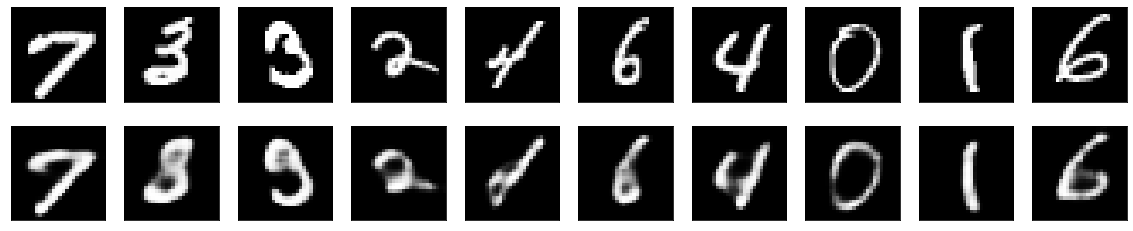

In [7]:
visualize(auto_encoder_model, X_test)
